# HW3: Regression and Classification

In this assignment you will preprocess the dataset and perform some basic regression and classification tasks. The learning outcome of this part is to know how one can pre-process a real-world dataset and perform a supervised learning task, and to understand some of the fundamental mechanisms behind these tasks.

### Student information
Please provide your information for automatic grading.

In [346]:
STUD_SUID = 'aabb0000'
STUD_NAME = 'Aaaa Bbbb'
STUD_EMAIL = 'aaaa.bbbb@dsv.su.se'

##  Grading: 

Pass/Fail.

To Pass this HW you need to provide a complete and correct solution, where one minor mistake is allowed. However, if your solution has more minor mistakes or lacks parts entirely or has one or more major mistakes, then you receive a Fail grade.

## OUTLINE: 

Data pre-processing, regression task and classification task

1. Reading the files
2. Missing Values
3. Imputing categorical variables
4. Imputing numerical variables
5. Classification with Decision Tree, single split
6. Classification with Decision Tree, Cross validation
7. Interpretation of the results

## Important instructions:

Each function you make will be considered during the grading, so it is important to strictly follow input and output instructions stated in the skeleton code.

You must not delete any of the given cells or change the structure of the cells or change the instructions in the cells or add cells (unless completely necessary, add a comment on why you added a cell) as they will help in grading the assignment. Should you contravene this provision, you will fail the assignment, and no feedback will be given on the part after the contravention.

Some variable names are already given and have random values or empty arrays assigned on them. In this case you should only change the assignments on the variables but keep the names as given.

When you are finished with implementing all the tasks, **clear all outputs, run all cells again** (make sure there is no error) and submit!

Make sure that the results and figures asked are visible for us to grade.

Make sure not to modify the files in the "data" folder in your submission, and not to change the folder structure or the files location, or your submission will not obtain a passing grade.

To ensure consistent results, make sure that every operation in which you can use a random seed has it set to 8. If your process is correct, but the results are wrong due to the seed being wrong, it will be considered a major mistake.

In [347]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split


RSEED = 8

## *1.* Reading the files

### `Task: Read the datasets using pandas. Use the files called cleveland.data and switzerland.data that you have downloaded in this archive.`

The datasets contain information about adult patients from the US and from Switzerland. You can find more information in the heart-disease.names file in the 'data' folder.

In [348]:
# # From the folder 'data', read the files cleveland.data and switzerland.data into the dataframes cleveland and test, respectively.
# # Make sure to add the names of the variables to both dataframes.

 
# columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'] # you can find the column names in the file 'data/heart-disease.names'.
# # Select the correct column names for the dataset, as described in the file.
# print(columns)

# cleveland1 = pd.read_csv("../data/cleveland.data", names=columns )
# cleveland = pd.DataFrame(cleveland1)  
# print(cleveland)
# test1 = pd.read_csv("../data/switzerland.data", names=columns)
# test = pd.DataFrame(test1)       
# print(test)

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
           'oldpeak', 'slope', 'ca', 'thal', 'num']

cleveland = pd.read_csv("../data/cleveland.data", names=columns )

test = pd.read_csv('../data/switzerland.data', names=columns)




    
# to fix in cleveland   : age, set limit.  
# to fix in test        :

In [349]:
# do not delete this!
cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [350]:
# do not delete this!
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,?,0,127.0,0.0,0.7,1,?,?,1.0
1,34.0,1.0,4.0,115.0,0.0,?,?,154.0,0.0,0.2,1,?,?,1.0
2,36.0,1.0,4.0,110.0,0.0,?,0,125.0,1.0,1.0,2,?,6,1.0
3,38.0,0.0,4.0,105.0,0.0,?,0,166.0,0.0,2.8,1,?,?,2.0
4,38.0,0.0,4.0,110.0,0.0,0,0,156.0,0.0,0.0,2,?,3,1.0


In [351]:
# if you want to see information about the dataset, 
# uncomment:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,60.270627,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,77.296578,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,0.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,999.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [352]:
# if you want to see information about the dataset, uncomment:
test.describe()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,num
count,122.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,117.000000
mean,82.409836,0.914530,3.683761,129.957265,0.0,122.299145,0.435897,0.653846,1.769231
std,170.211621,0.280782,0.702822,22.423200,0.0,25.759921,0.498007,1.056061,1.011866
min,0.000000,0.000000,1.000000,80.000000,0.0,60.000000,0.000000,-2.600000,0.000000
25%,48.500000,1.000000,4.000000,115.000000,0.0,105.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,121.000000,0.000000,0.300000,2.000000
75%,61.000000,1.000000,4.000000,145.000000,0.0,141.000000,1.000000,1.500000,3.000000
max,999.000000,1.000000,4.000000,200.000000,0.0,182.000000,1.000000,3.700000,4.000000


## *2.* Missing values

### `Task: Produce a plot with two subplots, each showing a bar plot of the 'missing' values (either encoded as NaN, or encoded with values that should not be in the dataset) for each feature for the two dataframes. The plot must have a name, and the bars must be named using the feature names.`





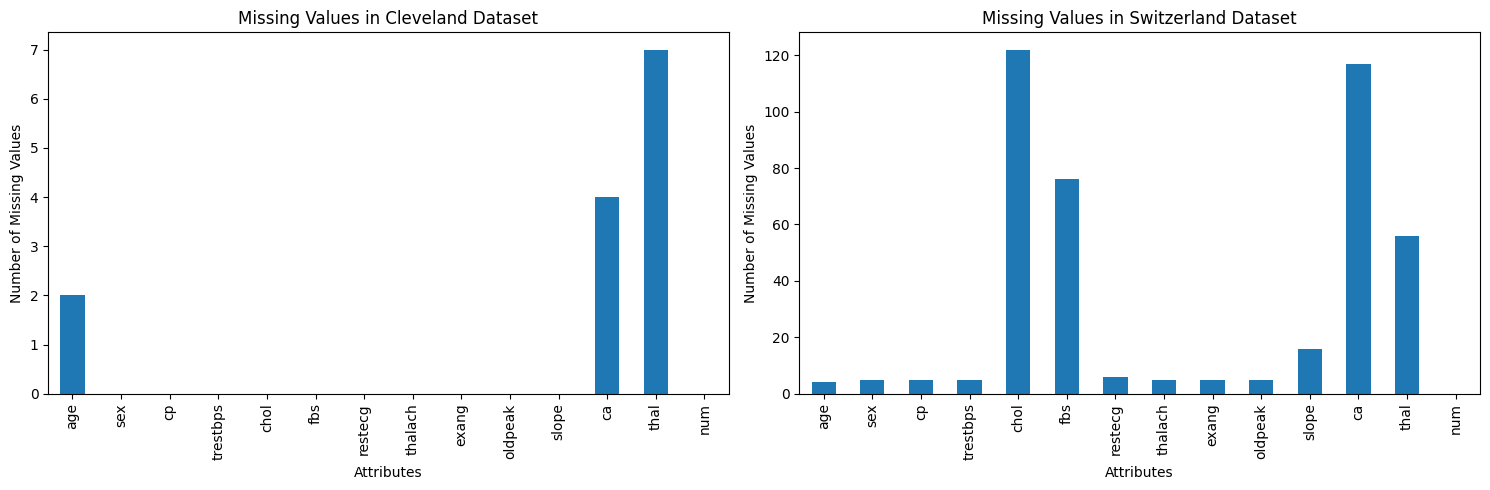

age         2
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        7
num         0
dtype: int64
age           4
sex           5
cp            5
trestbps      5
chol        122
fbs          76
restecg       6
thalach       5
exang         5
oldpeak       5
slope        16
ca          117
thal         56
num           0
dtype: int64


In [353]:
# Create 1 figure with a set of 2 subplots. Each axes should contain a figure as described below: 

# subplot 1: A barplot with the missing valies for each attribute in the dataset 'cleveland'
# subplot 2: A barplot with the missing valies for each attribute in the dataset 'test'
# Subplot 1: Cleveland dataset



# Convert non-numeric values to NaN for all columns
for col in cleveland.columns:
    cleveland[col] = pd.to_numeric(cleveland[col], errors='coerce')

# filter age above 120 to nan
cleveland.loc[cleveland['age'] > 120, 'age'] = np.nan
# filter num values which are not 1 or 0 to 1
cleveland.loc[~cleveland['num'].isin([1, 2]), 'num'] = 1
# filter and convert chol values 0 to nan
cleveland.loc[cleveland['chol'] == 0, 'chol'] = np.nan



# Convert non-numeric values to NaN for all columns
for col in test.columns:
    test[col] = pd.to_numeric(test[col], errors='coerce')

# filter age above 120 to nan
test.loc[test['age'] > 120, 'age'] = np.nan
# filter num values which are not 1 or 0 to 1
test.loc[~test['num'].isin([0, 1]), 'num'] = 1
# filter and convert chol values 0 to nan
test.loc[test['chol'] == 0, 'chol'] = np.nan



# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Cleveland dataset
cleveland_missing = cleveland.isnull().sum()
cleveland_missing.plot(kind='bar', ax=axes[0])
axes[0].set_title('Missing Values in Cleveland Dataset')
axes[0].set_ylabel('Number of Missing Values')
axes[0].set_xlabel('Attributes')

# Subplot 2: Test dataset (Switzerland)
test_missing = test.isnull().sum()
test_missing.plot(kind='bar', ax=axes[1])
axes[1].set_title('Missing Values in Switzerland Dataset')
axes[1].set_ylabel('Number of Missing Values')
axes[1].set_xlabel('Attributes')


plt.tight_layout()
plt.show()


print(cleveland.isnull().sum())         # count nan values

print(test.isnull().sum())              # count nan values



# to fix in cleveland   : age, set limit.  num,
# to fix in test        : age, chol, num, ca, 

## *3.* Imputing categorical variables

In the file 'data/heart-disease.names' you can find, together with the names of the columns, a description of their contents.

Determine which columns are categorical, and set their type to object.

Determine which columns are numerical, and set their type accordingly.

In [354]:

# 3 age: age in years  # float 
# 4 sex: sex (1 = male; 0 = female) # float 
# 9 cp: chest pain type # float 
#         -- Value 1: typical angina
#         -- Value 2: atypical angina
#         -- Value 3: non-anginal pain
#         -- Value 4: asymptomatic
# 10 trestbps: resting blood pressure (in mm Hg on admission to the  # float 
#         hospital)
# 12 chol: serum cholestoral in mg/dl float 
# 16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
# 19 restecg: resting electrocardiographic results
#         -- Value 0: normal
#         -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
#                     elevation or depression of > 0.05 mV)
#         -- Value 2: showing probable or definite left ventricular hypertrophy
#                     by Estes' criteria
# 32 thalach: maximum heart rate achieved
# 38 exang: exercise induced angina (1 = yes; 0 = no)
# 40 oldpeak = ST depression induced by exercise relative to rest
# 41 slope: the slope of the peak exercise ST segment
#         -- Value 1: upsloping
#         -- Value 2: flat
#         -- Value 3: downsloping
# 44 ca: number of major vessels (0-3) colored by flourosopy
# 51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# 58 num: diagnosis of heart disease (angiographic disease status)
#         -- Value 0: < 50% diameter narrowing
#         -- Value 1: > 50% diameter narrowing
#         (in any major vessel: attributes 59 through 68 are vessels)



# Define categorical and numerical columns based on the provided description
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Convert categorical columns to object type
for col in categorical_cols:
    cleveland[col] = cleveland[col].astype('object')
    test[col] = test[col].astype('object')

# Ensure numerical columns are numeric (already handled in previous code)
for col in numerical_cols:
    cleveland[col] = pd.to_numeric(cleveland[col], errors='coerce')
    test[col] = pd.to_numeric(test[col], errors='coerce')

# Print the data types of each column to verify the changes (optional)
print(cleveland.dtypes)
print(test.dtypes)


age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num          object
dtype: object
age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num          object
dtype: object


### ` Task: Split the cleveland dataframe in a train and a validation set. `

The train set must be called train, the the validation set must be called val. The size of the validation set must be 30% of the total size of the cleveland dataframe. Use shuffle=True and stratify=True. Make sure that both train and val are dataframes, and that the columns have the correct names. Reset the indexes of all four the dataframes, using drop=True.

In [355]:

# Split the data into training and validation sets
train, val = train_test_split(cleveland, test_size=0.3, random_state=RSEED, shuffle=True, stratify=cleveland['num'])

# Reset the index of the DataFrames
train = train.reset_index(drop=True)
val = val.reset_index(drop=True)

# Split the data into X and y
X_cleveland = train.drop('num', axis=1)
y_cleveland = train['num']

X_test = val.drop('num', axis=1)
y_test = val['num']

In [356]:
from sklearn.model_selection import train_test_split

X_train = X_cleveland
X_val = X_test
y_train = y_cleveland
y_val = y_test

In [357]:
# DO NOT DELETE/CHANGE THIS CELL
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,76.0,0.0,3.0,140.0,197.0,0.0,1.0,116.0,0.0,1.1,2.0,0.0,3.0
1,47.0,1.0,3.0,108.0,243.0,0.0,0.0,152.0,0.0,0.0,1.0,0.0,3.0
2,54.0,0.0,3.0,110.0,214.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0
3,66.0,0.0,4.0,178.0,228.0,1.0,0.0,165.0,1.0,1.0,2.0,2.0,7.0
4,NaN,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0


In [358]:
# DO NOT DELETE/CHANGE THIS CELL
X_val.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.0,3.0
1,42.0,1.0,3.0,130.0,180.0,0.0,0.0,150.0,0.0,0.0,1.0,0.0,3.0
2,34.0,1.0,1.0,118.0,182.0,0.0,2.0,174.0,0.0,0.0,1.0,0.0,3.0
3,55.0,1.0,2.0,130.0,262.0,0.0,0.0,155.0,0.0,0.0,1.0,0.0,3.0
4,35.0,1.0,4.0,120.0,198.0,0.0,0.0,130.0,1.0,1.6,2.0,0.0,7.0


In [359]:
# To make the classification task easier, transform the target variable into a binary variable.
# If the target variable is 0, it should remain 0. If the target variable is different from 0, it should be transformed into 1.


y_train = (y_train != 0).astype(int)
y_val = (y_val != 0).astype(int)
y_test = (y_test != 0).astype(int)

In [360]:
# DO NOT DELETE/CHANGE THIS CELL

'''
train_set_from_franco = pd.read_csv('../../../testing_data/train.csv')
val_set_from_franco = pd.read_csv('../../../testing_data/val.csv')

assert train.equals(train_set_from_franco), 'train set is not correct'
assert val.equals(val_set_from_franco), 'validation set is not correct'
'''


"\ntrain_set_from_franco = pd.read_csv('../../../testing_data/train.csv')\nval_set_from_franco = pd.read_csv('../../../testing_data/val.csv')\n\nassert train.equals(train_set_from_franco), 'train set is not correct'\nassert val.equals(val_set_from_franco), 'validation set is not correct'\n"

### ` Task: impute the missing values in the categorical columns. Use a KNNImputer from sklearn for the imputation process. `

In [361]:
# 1. Create a subset of the train dataset with only the categorical columns. Call this subset train_cat.
# 2. Create a subset of the val dataset with only the categorical columns. Call this subset val_cat.
# 3. Create a subset of the test dataset with only the categorical columns. Call this subset test_cat
# 4. Impute the three datasets using a KNN imputer with k=5 and weights set to distance
# 5. Save the results in train_imputed_knn, val_imputed_knn, and test_imputed_knn.
# 6. Make sure to add the column names to the resulting dataframes. DO NOT SKIP THIS STEP.
# The new values might have new values that are not in the original dataset.
# Approximate them to the nearest value in the original dataset, for each column.
# To do so, you can store the original values of each column in a dictionary or a list.
# if a new value is equidistant from two original values, choose the largest one.
# (Example: if the original values are [1, 3] and the new value is 2, it will become 3)

from sklearn.impute import KNNImputer

# 1. & 2. Create subsets with categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
train_cat = train[categorical_cols]
val_cat = val[categorical_cols]
test_cat = test[categorical_cols]

# Store original values for each categorical column
original_values = {}
for col in categorical_cols:
    original_values[col] = sorted(train_cat[col].dropna().unique())


# 3. Impute the datasets using KNN imputer
imputer = KNNImputer(n_neighbors=5, weights='distance')

train_imputed_knn = pd.DataFrame(imputer.fit_transform(train_cat))
val_imputed_knn = pd.DataFrame(imputer.transform(val_cat))
test_imputed_knn = pd.DataFrame(imputer.transform(test_cat))


# Add column names back
train_imputed_knn.columns = categorical_cols
val_imputed_knn.columns = categorical_cols
test_imputed_knn.columns = categorical_cols

# Approximate new values to the nearest original value
def approximate_to_nearest(value, original_vals):
    if pd.isna(value):
      return value
    
    if value in original_vals:
        return value
    
    distances = [abs(value - original_val) for original_val in original_vals]
    min_distance = min(distances)
    
    candidates = [original_vals[i] for i, d in enumerate(distances) if d == min_distance]
    return max(candidates)

for col in categorical_cols:
    train_imputed_knn[col] = train_imputed_knn[col].apply(lambda x: approximate_to_nearest(x, original_values[col]))
    val_imputed_knn[col] = val_imputed_knn[col].apply(lambda x: approximate_to_nearest(x, original_values[col]))
    test_imputed_knn[col] = test_imputed_knn[col].apply(lambda x: approximate_to_nearest(x, original_values[col]))

In [362]:
# DO NOT DELETE/CHANGE THIS CELL
'''
train_imp_knn_franco = pd.read_csv('../../../testing_data/train_imp_knn.csv')
val_imp_knn_franco = pd.read_csv('../../../testing_data/val_imp_knn.csv')
test_imp_knn_franco = pd.read_csv('../../../testing_data/test_imp_knn.csv')

assert train_imputed_knn.equals(train_imp_knn_franco), 'train imputed knn is not correct'
assert val_imputed_knn.equals(val_imp_knn_franco), 'val imputed knn is not correct'
assert test_imputed_knn.equals(test_imp_knn_franco), 'test imputed knn is not correct'
'''

"\ntrain_imp_knn_franco = pd.read_csv('../../../testing_data/train_imp_knn.csv')\nval_imp_knn_franco = pd.read_csv('../../../testing_data/val_imp_knn.csv')\ntest_imp_knn_franco = pd.read_csv('../../../testing_data/test_imp_knn.csv')\n\nassert train_imputed_knn.equals(train_imp_knn_franco), 'train imputed knn is not correct'\nassert val_imputed_knn.equals(val_imp_knn_franco), 'val imputed knn is not correct'\nassert test_imputed_knn.equals(test_imp_knn_franco), 'test imputed knn is not correct'\n"

## *4.* Imputing numerical variables

### ` Task: impute the missing values in the numerical columns. Use a Lasso Regression from sklearn for the imputation process. `
If more than one column contains missing values, proceed in increasing order: the lowest number of missing values first, then the second lowest, then the third ...

Exclude the columns with missing values when fitting your regressor: only train on columns without missing values. After a column has been imputed, it can be used to fit the regressor in the next step.

In [ ]:
# 1. Create a subset of the train dataset with only the numerical columns. 
# 2. Create a subset of the val dataset with only the numerical columns. Call this subset val_num.
# 3. Create a subset of the test dataset with only the numerical columns. Call this subset test_num.
# 4a. Create a subset of train_num containing the rows with missing values. Call this subset train_num_missing.
# 4b. Create a subset of train_num containing the rows without missing values. Call this subset train_num_not_missing.
# 5a. Create a subset of val_num containing the rows with missing values. Call this subset val_num_missing.
# 5b. Create a subset of val_num containing the rows without missing values. Call this subset val_num_not_missing.
# 6a. Create a subset of test_num containing the rows with missing values. Call this subset test_num_missing.
# 6b. Create a subset of test_num containing the rows without missing values. Call this subset test_num_not_missing.
# 7. Using a Lasso regression, impute the missing values in train_num_missing, val_num_missing, and test_num_missing.
# On what should the Lasso regression be trained?
# 8. Repeat steps 1-7 until all the missing values are imputed.
# 9. Save the results in train_num_imputed_lasso, val_num_imputed_lasso, and test_num_imputed_lasso.
# 10. Concatenate the imputed subsets with the subsets that did not contain missing values.
# 11. Save the resulting datasets in train_imputed_lasso, val_imputed_lasso, and test_imputed_lasso.
# IMPORTANT: The order of the rows should be the same as in the original datasets.
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer


numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
train_num = train[numerical_cols] # 1. Create a subset of the train dataset with only the numerical columns.Call this subset train_num.
val_num = val[numerical_cols]
test_num = test[numerical_cols]

# 4. Create subsets of train_num with and without missing values
train_num_missing = train_num[train_num.isnull().any(axis=1)]
train_num_not_missing = train_num.dropna()

# 5. Create subsets of val_num with and without missing values
val_num_missing = val_num[val_num.isnull().any(axis=1)]
val_num_not_missing = val_num.dropna()

# 6. Create subsets of test_num with and without missing values
test_num_missing = test_num[test_num.isnull().any(axis=1)]
test_num_not_missing = test_num.dropna()
# 7. Impute missing values using Lasso regression
# Train Lasso on the subset without missing values

# Before training Lasso, impute missing values in X_train_lasso using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
X_train_lasso = train_num_not_missing.drop(columns=['chol'])  # Example: Exclude 'chol' if it has missing values in the non-missing subset
y_train_lasso = train_num_not_missing['chol']  # Example: Predict 'chol'
X_train_lasso_imputed = pd.DataFrame(imputer.fit_transform(X_train_lasso), columns=X_train_lasso.columns, index=X_train_lasso.index)

lasso_model = Lasso(alpha=0.1)  # You can tune alpha
lasso_model.fit(X_train_lasso_imputed, y_train_lasso)  # Fit Lasso on imputed data



# Function to impute missing values using a Lasso model
def impute_with_lasso(df_missing, lasso_model, target_col):
    df_imputed = df_missing.copy()
    X_missing = df_missing.drop(columns=[target_col])
    
    # Impute missing values in X_missing before prediction using SimpleImputer
    X_missing_

c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Shape of passed values is (2, 3), indices imply (2, 4)

In [ ]:
# DO NOT DELETE/CHANGE THIS CELL
'''
train_imp_lasso_franco = pd.read_csv('../../../testing_data/train_imp_lasso.csv')
val_imp_lasso_franco = pd.read_csv('../../../testing_data/val_imp_lasso.csv')
test_imp_lasso_franco = pd.read_csv('../../../testing_data/test_imp_lasso.csv')

assert train_imputed_lasso.equals(train_imp_lasso_franco), 'train imputed lasso is not correct'
assert val_imputed_lasso.equals(val_imp_lasso_franco), 'val imputed lasso is not correct'
assert test_imputed_lasso.equals(test_imp_lasso_franco), 'test imputed lasso is not correct'
'''

"\ntrain_imp_lasso_franco = pd.read_csv('../../../testing_data/train_imp_lasso.csv')\nval_imp_lasso_franco = pd.read_csv('../../../testing_data/val_imp_lasso.csv')\ntest_imp_lasso_franco = pd.read_csv('../../../testing_data/test_imp_lasso.csv')\n\nassert train_imputed_lasso.equals(train_imp_lasso_franco), 'train imputed lasso is not correct'\nassert val_imputed_lasso.equals(val_imp_lasso_franco), 'val imputed lasso is not correct'\nassert test_imputed_lasso.equals(test_imp_lasso_franco), 'test imputed lasso is not correct'\n"

## *5.* Classification with Decision Tree, using a single split 

In [ ]:
# Merge the train_imputed_knn and train_imputed_lasso datasets. Call the resulting dataset X_train_imputed.
# Merge the val_imputed_knn and val_imputed_lasso datasets. Call the resulting dataset X_val_imputed.
# Merge the test_imputed_knn and test_imputed_lasso datasets. Call the resulting dataset X_test_imputed.

X_train_imputed = pd.concat([train_imputed_knn, train_imputed_lasso], axis=1)
X_val_imputed = pd.concat([val_imputed_knn, val_imputed_lasso], axis=1)
X_test_imputed = pd.concat([test_imputed_knn, test_imputed_lasso], axis=1)


### ` Task: Train a set of Decision Trees, using different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [ ]:
# 1. Create a dictionary to contain the hyperparameters. The dictionary should contain the following:
# - criterion: 'gini' and 'entropy'
# - max_depth: 3, 5, and 7
# - min_samples_split: 2, 5, and 10
# 2. Create a dictionary called performance to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the hyperparameters from the dictionary.
# 4. Create a for loop to iterate over the combinations of hyperparameters.
# 5. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation set.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary.

from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import time


# 1. Create a dictionary to contain the hyperparameters.
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# 2. Create a dictionary called performance to store the hyperparameter combinations and the corresponding performance of the model.
performance = {}

# 3. Create a ParameterGrid object with the hyperparameters from the dictionary.
param_grid = ParameterGrid(hyperparameters)


start = time.time() # DO NOT CHANGE/DELETE THIS LINE

# 4. Create a for loop to iterate over the combinations of hyperparameters.
for params in param_grid:
    # 5. In each iteration:
    # - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
    model = DecisionTreeClassifier(**params, random_state=RSEED)
    
    # - Fit the model.
    model.fit(X_train_imputed, y_train)
    
    # - Predict the target variable for the validation set.
    y_pred = model.predict(X_val_imputed)
    
    # - Calculate the F1 score of the model.
    f1 = f1_score(y_val, y_pred)
    
    # - Add the hyperparameters and the F1 score to the performance dictionary.
    performance[str(params)] = f1

end = time.time() # DO NOT CHANGE/DELETE THIS LINE
# Print or further process the performance dictionary
for params, f1 in performance.items():
    print(f"Hyperparameters: {params}, F1 Score: {f1}")
print('Time elapsed to run the hyperparameter tuning with a single split: ', end - start) # DO NOT CHANGE/DELETE THIS LINE

Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}, F1 Score: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}, F1 Score: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}, F1 Score: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}, F1 Score: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}, F1 Score: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}, F1 Score: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}, F1 Score: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 5}, F1 Score: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 10}, F1 Score: 1.0
Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}, F1 Score: 1.0
Hyperparameters: {'criterion': 'entropy', 'max_depth':

In [ ]:
# Find the hyperparameters that resulted in the best F1 score
best_hyperparameters = max(performance, key=performance.get)

best_hyperparameters

"{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}"

In [ ]:
# Concatenate the train and validation datasets.
X = pd.concat([X_train_imputed, X_val_imputed], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_val], axis=0).reset_index(drop=True)

# Create a DecisionTreeClassifier with the best hyperparameters.
# Find the best hyperparameters from the performance dictionary
best_params_str = max(performance, key=performance.get)
best_params = eval(best_params_str)  # Convert the string back to a dictionary

# Create the model with the best parameters
best_model = DecisionTreeClassifier(**best_params, random_state=RSEED)

# Fit the model on the combined training and validation sets
best_model.fit(X, y)

# Predict the target variable for the test dataset.
y_pred_test = best_model.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset.
# Convert test['num'] to a numeric type before calculating the F1 score
f1_test_single_split = f1_score(test['num'].astype(int), y_pred_test)

In [ ]:
f1_test_single_split # DO NOT DELETE/CHANGE THIS LINE

np.float64(0.9661016949152542)

## *6.* Classification with Decision Tree using Cross Validation

### ` Task: Train a cross-validation object, then train a decision tree using cross-validation and different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [ ]:
# 1. Use the same hyperparameters from the previous task.
# 2. Create a StratifiedKFold object with 5 splits, use shuffle=True.
# 3. Create a dictionary called performance_CV to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the usual hyperparameters.
# 4. Create a for loop to iterate over the folds of the StratifiedKFold.
# 5. For each fold, create a for loop to iterate over the combinations of hyperparameters.
# 6. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation fold.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary. Each hyperparameter combination may have multiple F1 scores.

from sklearn.model_selection import StratifiedKFold

# Assuming RSEED is defined elsewhere in your code
RSEED = 42  # Replace with your actual RSEED value if different

# ... (your existing code) ...

# 2. Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RSEED)

# 3. Create a dictionary to store performance
performance_CV = {}

# 4 & 5. Iterate over folds and hyperparameters
for fold, (train_index, val_index) in enumerate(skf.split(X_train_imputed, y_train)):
    X_train_fold, X_val_fold = X_train_imputed.iloc[train_index], X_train_imputed.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    for params in param_grid:
        model = DecisionTreeClassifier(**params, random_state=RSEED)
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        f1 = f1_score(y_val_fold, y_pred)

        # Store results, handling potential key collisions
        key = str(params)
        if key not in performance_CV:
            performance_CV[key] = []
        performance_CV[key].append(f1)

# Print or further process the performance_CV dictionary
for params, f1_scores in performance_CV.items():
    print(f"Hyperparameters: {params}, F1 Scores: {f1_scores}, Average F1: {np.mean(f1_scores)}")

Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}, F1 Scores: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)], Average F1: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}, F1 Scores: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)], Average F1: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}, F1 Scores: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)], Average F1: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}, F1 Scores: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)], Average F1: 1.0
Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}, F1 Scores: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)], Average F1: 1.0
Hyperparameters: {'criterion'

In [ ]:
# select the best performing hyperparameters, which are the ones with the highest average F1 score
# Calculate the average F1 score for each hyperparameter combination
average_f1_scores = {params: np.mean(scores) for params, scores in performance_CV.items()}

# Find the hyperparameters with the highest average F1 score
best_hyperparameters_CV = max(average_f1_scores, key=average_f1_scores.get)

best_hyperparameters_CV # DO NOT DELETE/CHANGE THIS LINE

"{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}"

In [ ]:
print(type(best_hyperparameters_CV))

<class 'str'>


In [ ]:
# Create a DecisionTreeClassifier with the best hyperparameters.
# Fit the model on the X and y datasets.
# Call the fitted model final_tree.

import ast

best_hyperparameters_CV = ast.literal_eval("{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}")

final_tree = DecisionTreeClassifier(**best_hyperparameters_CV, random_state=RSEED)

final_tree.fit(X, y)

# Predict the target variable for the test dataset.

# Write your code here

y_pred_test_CV = final_tree.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_CV.

# Write your code here

f1_test_CV = f1_score(val, y_pred_test_CV)

f1_test_CV # change this

ValueError: Found input variables with inconsistent numbers of samples: [91, 122]

In [ ]:
f1_test_CV # DO NOT DELETE/CHANGE THIS LINE 
 
  
   
   

## *7.* Interpretation of the results 

### ` Task: Look at the times elapsed to train the Decision Tree using the single split and the CV strategies. Is there a difference? Explain the difference or the lack of difference in 50 words or less. `

Write your explanation here. Delete this text.

### ` Task: Plot final_tree, and explain which feature or combination of features is the most relevant for that model, in 50 words or less. `

You can find instructions on how to plot a decision tree at [this link](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py).

In [ ]:
# plot your tree here.

Write your explanation here. Delete this text.